In [36]:
from pathlib import Path
data = Path('18.txt').read_text()
data = """5,4
4,2
4,5
3,0
2,1
6,3
2,4
1,5
0,6
3,3
2,6
5,1
1,2
5,5
2,5
6,5
1,4
0,4
6,4
1,1
6,1
1,0
0,5
1,6
2,0"""
S = 6

data = Path('18.txt').read_text()
S = 70
th = 1024

In [37]:
data.splitlines()
coord = [tuple(int(k) for k in l.split(',')) for l in data.splitlines()]
coord, len(coord)




([(7, 0),
  (59, 45),
  (15, 9),
  (60, 37),
  (61, 43),
  (4, 39),
  (7, 9),
  (62, 51),
  (21, 21),
  (9, 19),
  (27, 2),
  (17, 41),
  (1, 38),
  (68, 19),
  (3, 11),
  (1, 4),
  (63, 60),
  (55, 27),
  (67, 18),
  (14, 11),
  (9, 7),
  (7, 19),
  (2, 51),
  (6, 33),
  (3, 14),
  (26, 13),
  (5, 46),
  (21, 5),
  (15, 5),
  (15, 41),
  (18, 21),
  (13, 7),
  (6, 49),
  (67, 27),
  (21, 29),
  (5, 41),
  (65, 47),
  (63, 56),
  (21, 4),
  (12, 49),
  (5, 9),
  (53, 57),
  (5, 42),
  (61, 59),
  (7, 21),
  (7, 20),
  (3, 9),
  (25, 40),
  (3, 37),
  (1, 37),
  (40, 59),
  (61, 58),
  (66, 59),
  (65, 46),
  (19, 45),
  (51, 60),
  (65, 62),
  (15, 3),
  (67, 69),
  (7, 17),
  (67, 56),
  (30, 11),
  (27, 1),
  (14, 15),
  (3, 31),
  (2, 27),
  (18, 17),
  (3, 46),
  (67, 32),
  (1, 31),
  (67, 54),
  (59, 54),
  (63, 19),
  (69, 29),
  (8, 5),
  (13, 23),
  (6, 7),
  (21, 24),
  (17, 43),
  (14, 1),
  (21, 40),
  (14, 33),
  (9, 16),
  (1, 13),
  (3, 22),
  (61, 39),
  (67, 55),
  (63

In [38]:
from itertools import product

In [39]:
maze = list(product(range(0,S+1), repeat=2))
maze[-1]

(70, 70)

In [40]:
def neighbors(pos):
    x,y = pos
    yield x+1, y
    yield x-1, y
    yield x,y+1
    yield x, y-1

def inbound(pos):
    x,y = pos
    return 0<=x<=S and 0<= y <= S

In [41]:
from heapq import heappush as push, heappop as pop

In [42]:
from itertools import count

In [65]:
global visited 
def djik(maze, blocked, start):
    open = [(0,0,start)]
    global visited
    visited = dict()
    k = 0
    while True:
        k+=1
        if not open:
            return 'impossible'
        est, score, pos = pop(open)
        
        if pos in visited :
            if visited[pos] > score:
                visited[pos]=score
            elif score >= visited[pos]:
                continue
            else:
                assert False
            
            
        elif pos not in visited:
            visited[pos]=score
        if pos == (S, S):
            return score
        for v in [n for n in neighbors(pos) if inbound(n) and n not in blocked]:
            if v in visited.keys():
                continue
            else:
               #visited[v] = score
               #print('\r',k, score+1, v, end='')
               push(open, (score+2*S-v[0]-v[1], score+1, v))
            
        
        

In [66]:
djik(maze, coord[:1024], (0,0)) #380 too high

360

In [62]:
djik(maze, coord[:2048], (0,0))

374

In [76]:
# 2048 - open
# 2749 - 500
# 2924 - 500
# 2967 - 500
# 2989 - 500
# 2990 -- closing
# 2994 - close
# 3000 - close
# 3011 - close
# 3099 - close
# 3450 - close

In [98]:
t = 2989
print(t)
djik(maze, coord[:t], (0,0))

2989


500

In [99]:
coord[t]

(58, 62)

In [54]:
import seaborn as sns

<Axes: >

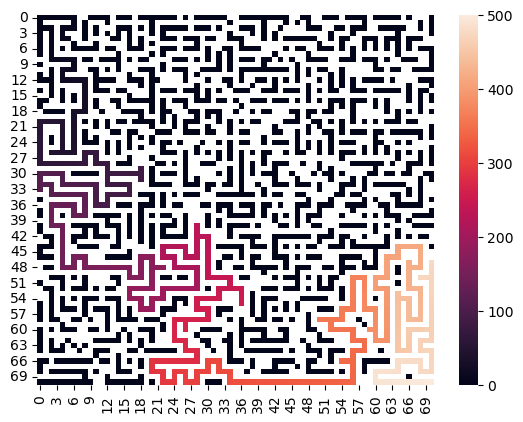

In [103]:
import numpy as np
a = np.zeros((S+1,S+1))
import  matplotlib.pyplot as plt
for x,y in coord[:t]:
    a[y,x] = None
for (x,y),val in visited.items():
    a[y,x] = val

sns.heatmap(a, annot=S < 10)

<Axes: >

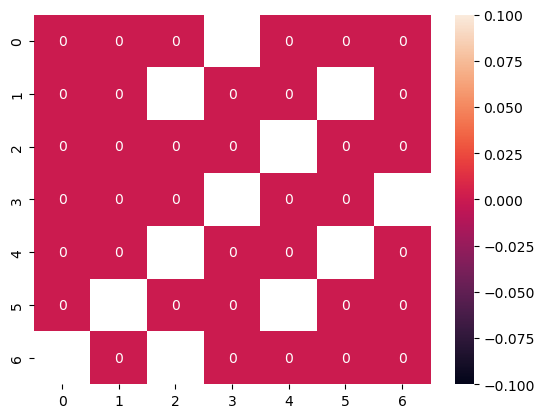